         ID  diagnosis     a1     a2      a3      a4       a5       a6  \
0    842302          M  17.99  10.38  122.80  1001.0  0.11840  0.27760   
1    842517          M  20.57  17.77  132.90  1326.0  0.08474  0.07864   
2  84300903          M  19.69  21.25  130.00  1203.0  0.10960  0.15990   
3  84348301          M  11.42  20.38   77.58   386.1  0.14250  0.28390   
4  84358402          M  20.29  14.34  135.10  1297.0  0.10030  0.13280   

       a7       a8  ...    a21    a22     a23     a24     a25     a26     a27  \
0  0.3001  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.0869  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
2  0.1974  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504   
3  0.2414  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869   
4  0.1980  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000   

      a28     a29      a30  
0  0.2654  0.4601  0.11890  
1  0.1860 

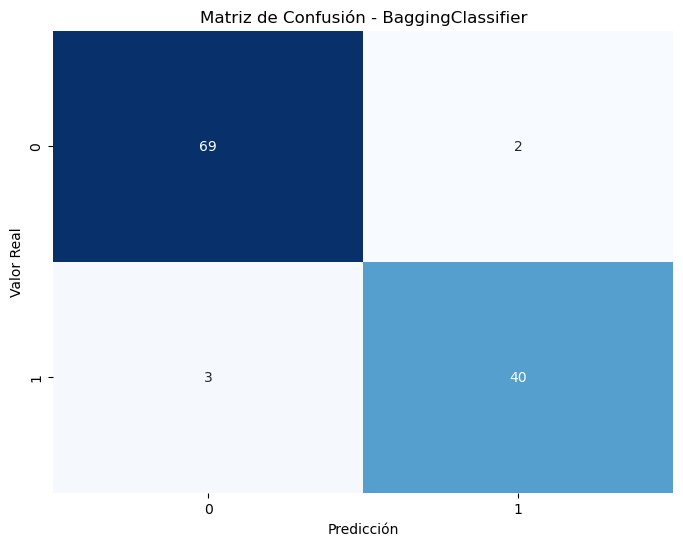

RandomForestClassifier - Reporte de clasificación:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



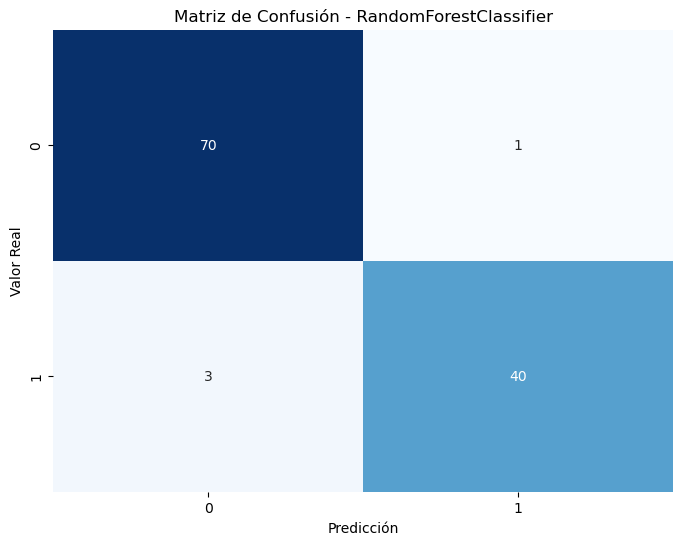

ExtraTreesClassifier - Reporte de clasificación:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



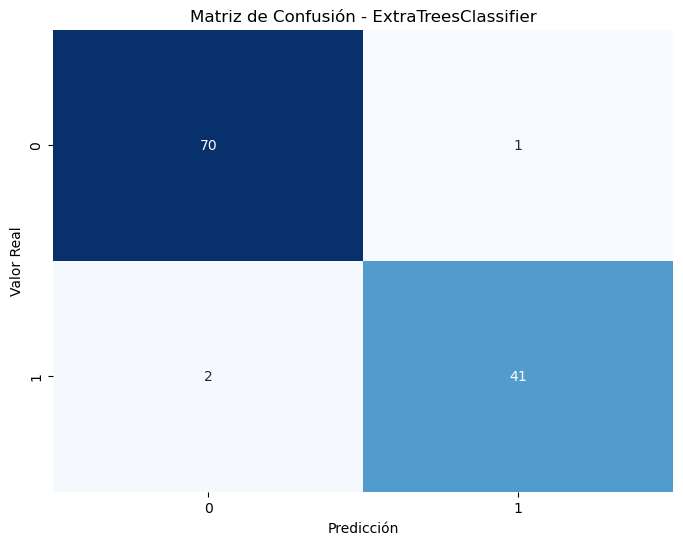

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('breast_cancer.csv')

print(data.head())
print(data.info())

X = data.drop(' diagnosis', axis=1)  # Features
y = data[' diagnosis']  # Target variable

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_bagging = bagging_model.predict(X_test)

# Calcular métricas de evaluación
print("BaggingClassifier - Reporte de clasificación:")
print(classification_report(y_test, y_pred_bagging))

# Matriz de confusión
conf_mat_bagging = confusion_matrix(y_test, y_pred_bagging)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_bagging, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - BaggingClassifier')
plt.show()

# Crear y entrenar el modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas de evaluación
print("RandomForestClassifier - Reporte de clasificación:")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - RandomForestClassifier')
plt.show()

# Crear y entrenar el modelo ExtraTreesClassifier
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_et = et_model.predict(X_test)

# Calcular métricas de evaluación
print("ExtraTreesClassifier - Reporte de clasificación:")
print(classification_report(y_test, y_pred_et))

# Matriz de confusión
conf_mat_et = confusion_matrix(y_test, y_pred_et)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_et, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - ExtraTreesClassifier')
plt.show()